# Thử thách: Phân tích các từ khóa liên quan tới "Khoa học dữ liệu"

Trong ví dụ này, chúng ta hãy thực hiện một bài tập đơn giản bao gồm tất cả các bước của quy trình khoa học dữ liệu thông thường. Bạn không cần phải viết bất kỳ mã nào, bạn chỉ cần nhấp vào các ô bên dưới để thực thi chúng và quan sát kết quả.
Bạn nên thử đoạn mã này với một dữ liệu khác, tên miền khác trên wikipedia chẳng hạn.


## Mục tiêu

Hãy thử khám phá thêm các khái niệm liên quan bằng cách thực hiện quá trình **khai thác/thu thập văn bản**. Chúng ta sẽ bắt đầu bằng một bài viết về "Khoa học dữ liệu" trên một trang web bất kỳ, ví dụ như wikipedia, trích xuất các từ khóa từ đó và sau đó cố gắng trực quan hóa kết quả:

Đầu tiên, chúng ta copy địa chỉ 'https://vi.wikipedia.org/wiki/Khoa_học_dữ_liệu' rồi gán vào biến `url`.

Để chạy lệnh Python thì nhấn Shift + Enter hoặc nút Play/Run.

In [1]:
url = 'https://vi.wikipedia.org/wiki/Khoa_h%E1%BB%8Dc_d%E1%BB%AF_li%E1%BB%87u'

## Step 1: Getting the Data

Bước đầu tiên trong mọi quy trình khoa học dữ liệu là thu thập dữ liệu. Chúng ta sẽ sử dụng thư viện `requests` để làm điều này:

* `requests.get(url)`: Đoạn mã này gửi yêu cầu GET đến một URL để nhận nội dung phản hồi, nội dung cần lấy ở đây là nội dung của bài viết `.content`

* `.decode('utf-8')`: Đoạn mã này chuyển đổi chuỗi byte này thành chuỗi ký tự bằng cách sử dụng mã hóa UTF-8.

* `print(text[:1000])`: Đoạn mã này in ra 1.000 ký tự đầu tiên của nội dung đã giải mã, giúp bạn xem trước nội dung mà không cần tải toàn bộ dữ liệu.

In [2]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="vi" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Khoa học dữ liệu – Wikipedia tiếng Việt</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpre

## Step 2: Transforming the Data

Bước tiếp theo là chuyển đổi dữ liệu thành dạng phù hợp để xử lý. Trong bước trước, chúng ta đã tải xuống mã nguồn HTML từ trang và chúng ta cần chuyển đổi nó thành văn bản thuần túy (plain text).

Có nhiều cách để thực hiện điều này, chúng ta sẽ sử dụng cách tích hợp đơn giản nhất là sử dụng lớp [HTMLParser](https://docs.python.org/3/library/html.parser.html) để phân tích cú pháp (parse) một chuỗi HTML trích xuất thành nội dung văn bản, đồng thời loại bỏ các thẻ HTML và bỏ qua nội dung bên trong các thẻ `<script>` và `<style>`.

-Lớp `MyHTMLParser` kế thừa từ `HTMLParser` để tùy chỉnh việc xử lý các thẻ và dữ liệu HTML.

* Thuộc tính `script`: Biến cờ (flag) để theo dõi xem parser (cú pháp) hiện đang ở bên trong thẻ `<script>` hoặc `<style>` hay không.

* Thuộc tính `res`: Chuỗi để lưu trữ kết quả văn bản đã trích xuất.

-Phương thức `handle_starttag`: được dùng khi parser gặp một thẻ mở, `script` được đặt thành `True` để biểu thị rằng parser đang ở bên trong một trong những thẻ này.

-Phương thức `handle_endtag`: được dùng khi parser gặp một thẻ đóng, thuộc tính `script` được đặt lại thành `False`, biểu thị rằng parser đã ra khỏi thẻ đó.

-Phương thức `handle_data`: được dùng khi parser gặp dữ liệu văn bản giữa các thẻ. Nếu dữ liệu chỉ chứa khoảng trắng hoặc parser đang ở bên trong thẻ `<script>` hoặc `<style>`, phương thức sẽ bỏ qua dữ liệu này.

Ngược lại, dữ liệu sẽ được thêm vào thuộc tính `res`, với một khoảng trắng ở đầu và loại bỏ chuỗi '[ edit ]' nếu có.

-`parser = MyHTMLParser()`: Tạo một instance của lớp `MyHTMLParser`.

-`parser.feed(text)`: Cung cấp chuỗi `HTML text` cho parser để bắt đầu quá trình phân tích.

-`text = parser.res`: Gán kết quả văn bản đã trích xuất (không chứa thẻ HTML và nội dung `<script>`, `<style>`) cho biến `text`.

-`print(text[:1000])`: Lệnh in ra 1000 ký tự đầu tiên của chuỗi kết quả.

In [3]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Khoa học dữ liệu – Wikipedia tiếng Việt Bước tới nội dung Trình đơn chính Trình đơn chính chuyển sang thanh bên ẩn 
		Điều hướng
	 Trang Chính Nội dung chọn lọc Bài viết ngẫu nhiên Thay đổi gần đây Báo lỗi nội dung 
		Tương tác
	 Hướng dẫn Giới thiệu Wikipedia Cộng đồng Thảo luận chung Giúp sử dụng Liên lạc Tải lên tập tin Tìm kiếm Tìm kiếm Giao diện Quyên góp Tạo tài khoản Đăng nhập Công cụ cá nhân Quyên góp Tạo tài khoản Đăng nhập 
		Trang dành cho người dùng chưa đăng nhập  tìm hiểu thêm Đóng góp Thảo luận cho địa chỉ IP này Nội dung chuyển sang thanh bên ẩn Đầu 1 Tổng quan 2 Chỉ trích 3 Đọc thêm 4 Tham khảo Đóng mở mục lục Khoa học dữ liệu 49 ngôn ngữ العربية Azərbaycanca Bahasa Indonesia Bahasa Melayu বাংলা Български Català Čeština Deutsch Eesti Ελληνικά English Español Esperanto Euskara فارسی Français Galego 한국어 Հայերեն हिन्दी Ido IsiZulu Italiano עברית ಕನ್ನಡ Қазақша Latviešu Македонски မြန်မာဘာသာ Nederlands 日本語 Norsk bokmål ਪੰਜਾਬੀ Polski Português Runa Simi Русский Shqip Simple

## Step 3: Getting Insights

Bước quan trọng nhất là chuyển dữ liệu của chúng ta thành một dạng nào đó mà chúng ta có thể rút ra hiểu biết. Trong trường hợp của chúng ta, chúng ta muốn trích xuất các từ khóa từ văn bản và xem từ khóa nào có ý nghĩa hơn.

Chúng ta sẽ sử dụng thư viện Python có tên là [RAKE](https://github.com/aneesha/RAKE) để trích xuất từ ​​khóa. Trước tiên, hãy cài đặt thư viện này trong trường hợp nó không có sẵn:

In [4]:
import sys
!{sys.executable} -m pip install nlp_rake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 13.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.7/117.7 kB 8.8 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=f6cff4140b89344aedb93139b4b6d56d67973f6d79464ab8cfc13919306ef48d
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


Chức năng chính có sẵn từ đối tượng `Rake`, chúng ta có thể tùy chỉnh bằng một số tham số. Trong ví dụ này, chúng ta sẽ đặt:

-độ dài tối thiểu của từ khóa (min_chars) là 3 ký tự,

-tần suất tối thiểu của một từ khóa (min_freq) là 2,

-số lượng từ tối đa trong một từ khóa (max_words) là 4.

Bạn có thể thoải mái thử nghiệm với các giá trị khác và quan sát kết quả.

In [14]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=4,min_freq=2,min_chars=3)
res = extractor.apply(text)
res

[('cơ sở', 4.0),
 ("o'reilly media", 4.0),
 ('data science', 4.0),
 ('liên', 1.3333333333333333),
 ('thông', 1.3333333333333333),
 ('trong', 1.3333333333333333),
 ('khai', 1.2),
 ('khoa', 1.0714285714285714),
 ('liệu', 1.0588235294117647),
 ('công', 1.0),
 ('thống', 1.0),
 ('nguồn', 1.0),
 ('dụng', 1.0),
 ('tính', 1.0),
 ('viết', 1.0),
 ('truy', 1.0),
 ('loại', 1.0),
 ('2013', 0)]


Như vậy, chúng ta đã thu thập được một danh sách các thuật ngữ cùng với mức độ quan trọng liên quan. Như bạn có thể thấy, các từ khóa "cơ sở", "data science" và "nhà xuất bản o'reilly media" đều có mặt trong danh sách ở các vị trí hàng đầu.

## Step 4: Visualizing the Result

Mọi người có thể diễn giải dữ liệu tốt nhất dưới dạng trực quan. Do đó, thường có ý nghĩa khi trực quan hóa dữ liệu để rút ra một số tri thức và hiểu biết sâu sắc. Chúng ta có thể sử dụng thư viện `matplotlib` trong Python để vẽ biểu đồ phân phối đơn giản các từ khóa có liên quan đến chúng:

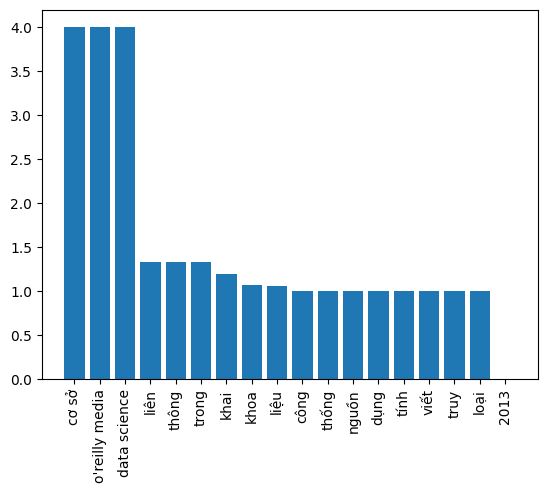

In [15]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

Tuy nhiên, có một cách tốt hơn để thể hiện tần suất các từ khóa bằng ​cách sử dụng **Word Cloud**. Chúng ta sẽ cần cài đặt một thư viện khác để vẽ biểu đồ đám mây từ danh sách từ khóa của mình.

In [16]:
!{sys.executable} -m pip install wordcloud

`WordCloud` có nhiệm vụ tiếp nhận văn bản gốc hoặc danh sách các từ khóa + tần suất được tính toán ở các bước trước, sau đó có thể hiển thị bằng `matplotlib`:

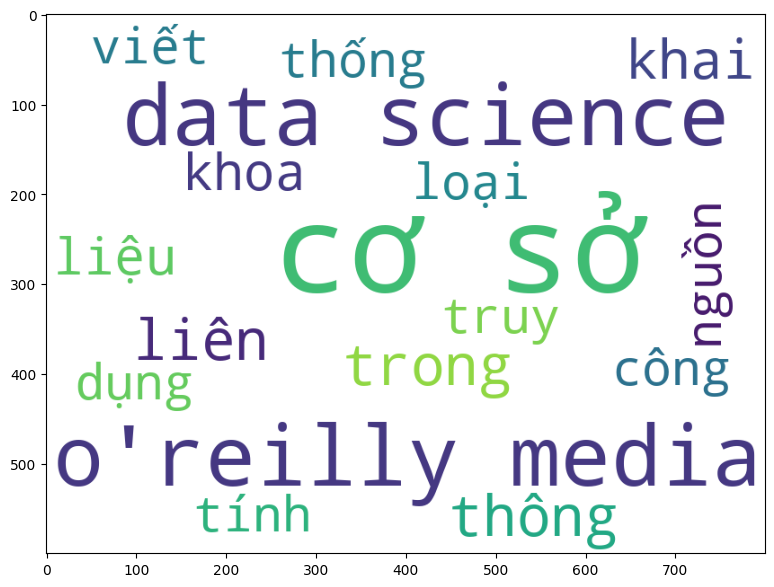

In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

Chúng ta cũng có thể truyền văn bản gốc vào `WordCloud` - hãy xem liệu chúng ta có thể nhận được kết quả tương tự hay không:

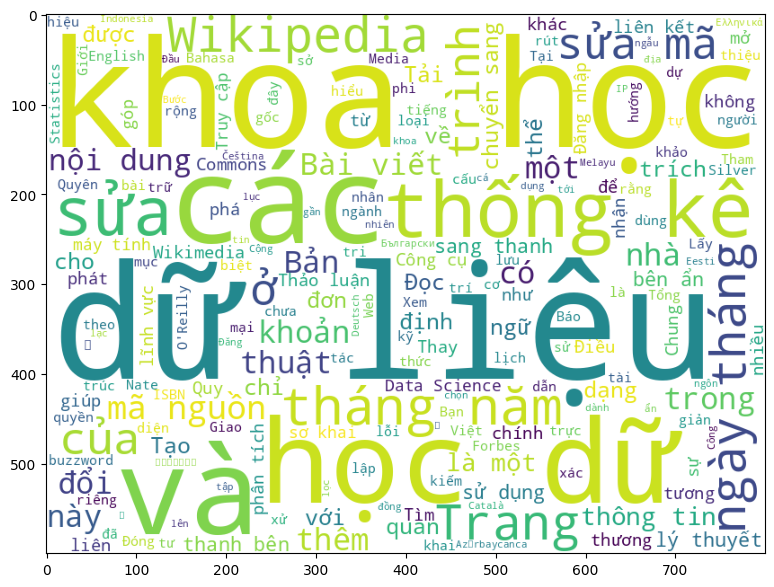

In [18]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

Bạn có thể thấy rằng đám mây từ bây giờ trông ấn tượng hơn, nhưng nó cũng chứa rất nhiều từ nhiễu (ví dụ: các từ không liên quan như `ngày tháng`, `sửa mã`). Ngoài ra, có từ khóa nhận được kết quả ít hơn, chẳng hạn như `data science`, `cơ sở`. Điều này là do thuật toán `RAKE` thực hiện tốt hơn nhiều trong việc chọn từ khóa tốt từ văn bản. Ví dụ này minh họa tầm quan trọng của việc xử lý trước và làm sạch dữ liệu, vì hình ảnh rõ ràng ở cuối sẽ cho phép chúng ta đưa ra quyết định tốt hơn.

* Trường hợp bạn đang làm việc trên máy cục bộ, lệnh `wc.to_file('wordcloud_vn.png')` sẽ lưu hình ảnh đám mây từ vào tệp `wordcloud_vn.png` trong thư mục làm việc hiện tại.

In [24]:
wc.generate(text).to_file('wordcloud_vn.png')

* Xác định thư mục lưu trữ trên máy cục bộ:

Đảm bảo rằng bạn có thư mục tương ứng trên máy cục bộ để lưu tệp. Nếu chưa có, bạn có thể tạo thư mục bằng lệnh:

In [25]:
import os
os.makedirs('1-Introduction/01-defining-data-science/images', exist_ok=True)

* Di chuyển tệp vào thư mục đã tạo:

Sau khi tạo hình ảnh, di chuyển tệp `wordcloud_vn.png` vào thư mục `1-Introduction/01-defining-data-science/images` trên máy cục bộ.

* Sử dụng Git để đẩy tệp lên GitHub:

Mở terminal hoặc command prompt, điều hướng đến thư mục dự án của bạn và thực hiện các lệnh sau:

In [ ]:
git add 1-Introduction/01-defining-data-science/images/wordcloud_vn.png
git commit -m "Thêm hình ảnh word cloud"
git push origin main


Trong bài tập này, chúng ta đã thực hiện một quá trình đơn giản để trích xuất một số ý nghĩa từ văn bản Wikipedia, dưới dạng từ khóa và đám mây từ. Ví dụ này khá đơn giản, nhưng nó thể hiện rõ tất cả các bước điển hình mà một nhà khoa học dữ liệu sẽ thực hiện khi làm việc với dữ liệu, bắt đầu từ việc thu thập dữ liệu, cho đến trực quan hóa.

Trong khóa học này, chúng ta sẽ cùng thảo luận chi tiết về tất cả các bước đó.